### ANOVA (ANalysis Of VAriance) 예제

In [24]:
from scipy.stats import f_oneway

# 세 그룹의 점수
group1 = [80, 85, 90]
group2 = [70, 75, 78]
group3 = [60, 65, 62]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F값: {f_stat:.2f}, p값: {p_value:.4f}")

F값: 24.28, p값: 0.0013


H0: 세개 그룹이 평균은 차이가 없다\
H1: 세개 그룹이 평균은 차이가 있다 (적어도 1개의 그룹은 다르다)

결과: f값 24 - 그룹간 분산의 차이가 그룹내 분산보다 크다\
p-value: 0.0013 => 유의수준보다 작다

귀무가설을 기각하고, 그룹간 평균은 유의미한 차이가 있다

In [27]:
P_A = 0.1 # 암의 확률
P_not_A = 1- P_A # 암이 아닐 확률
P_B_given_A = 0.95 # 양성판정의 정확도
P_B_given_not_A = 0.05 # 오진 (암이 아닌데, 양성 판정이 나올 확률)

# 베이즈의 정리
P_A_given_B = P_B_given_A * P_A / ((P_B_given_A * P_A) + (P_B_given_not_A * P_not_A))
P_A_given_B

0.6785714285714285

# 확률의 계산

## 동전던지기

In [28]:
space = ['앞면', '뒷면']
event = ['앞면']

prob = lambda event, space: len(event) / len(space)
prob(event, space)

0.5

In [29]:
# 주사위 던지기
# 1번 던져 3이 나올 확률

space = [1,2,3,4,5,6]
event = [3]

prob(event,space)

0.16666666666666666

# 확률의 덧셈

## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률

In [32]:
space = {1,2,3,4,5,6}
event_A = {2,4,6}
event_B = {5,6}


In [33]:
합집합 = event_A | event_B
합집합

{2, 4, 5, 6}

In [35]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률_1 = 합집합의갯수 / 전체경우의수
확률_1 # 짝수 또는 4보다 큰 눈이 나올 확률

0.6666666666666666

# 2 이하이거나 5 이상인 눈이 나올 확률

In [39]:
space = {1,2,3,4,5,6}
event_C = {1,2}
event_D = {5,6}

In [40]:
합집합1 = event_C | event_D
합집합1

{1, 2, 5, 6}

In [41]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률_2 = 합집합의갯수 / 전체경우의수
확률_2 # 짝수 또는 4보다 큰 눈이 나올 확률

0.6666666666666666

# 확률의 교집합

## 주사위를 던져 짝수 & 2일 확률

In [ ]:
# 조건부 확률
sample_space = [1,2,3,4,5,6]
event_A = [2,4,6]
event_B = [2]

P_A = len(event_A) / len(sample_space) # A일 확률
P_B = len(event_B) / len(sample_space) # B일 확률
P_B_and_A_ele = set(event_A) & set(event_B) # 교집합의 원소
P_B_and_A_ele

{2}

In [45]:
P_B_and_A = len(P_B_and_A_ele) / len(sample_space) # 교집합이 나올 확률
P_B_and_A

0.16666666666666666

In [47]:
# 조건부확률: 짝수일 때 2가 나올 확률
# P(B|A) = P(B_and_A) / P_A
P_B_given_A = P_B_and_A / P_A
P_B_given_A

0.3333333333333333

# 우도와 확률값

동전 10번 던지고, 8번 앞면이 나왔다.\
우도의 계산

In [53]:
from scipy.stats import binom

In [ ]:
n = 10
k = 8 # 앞면의 횟수

# 가설1 - 공정한 동전일 것이다
p1 = 0.5 #앞면이 나올 확률 - 공정할 경우
p1_likelihood = binom.pmf(k,n,p1) #조건, 총사건, 확률

# 가설2
p2 = 0.8
p2_likelihood = binom.pmf(k,n,p2) #조건, 총사건, 확률

p1_likelihood, p2_likelihood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설1의 경우, 앞면이 8번 나올 확률은 4.4%\
가설2의 경우, 앞면이 8번 나올 확률은 30.2%

앞면 8번 나오는 관측값은 p = 0.8인 모델이 더 잘 설명한다. (우도가 크다)

# 기대값
x의 확률들의 평균

In [56]:
x_values = [1,2,3]
p_x = [1/6,3/6,2/6]

exp_value = 0
#기대값
for i in range(len(x_values)):
    exp_value += x_values[i] * p_x[i]
    
print(f'기대값: {exp_value:.5f}')

기대값: 2.16667


In [57]:
from scipy.stats import norm

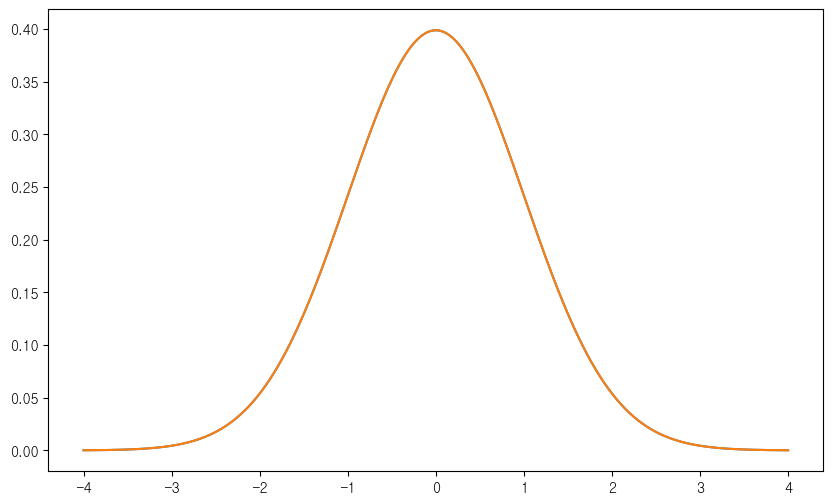

In [60]:
mu = 0
sigma = 1

x = np.linspace(-4,4,1000)
y = norm.pdf(x,loc=mu,scale=sigma)
plt.plot(x,y)
plt.show()

# 표집분포

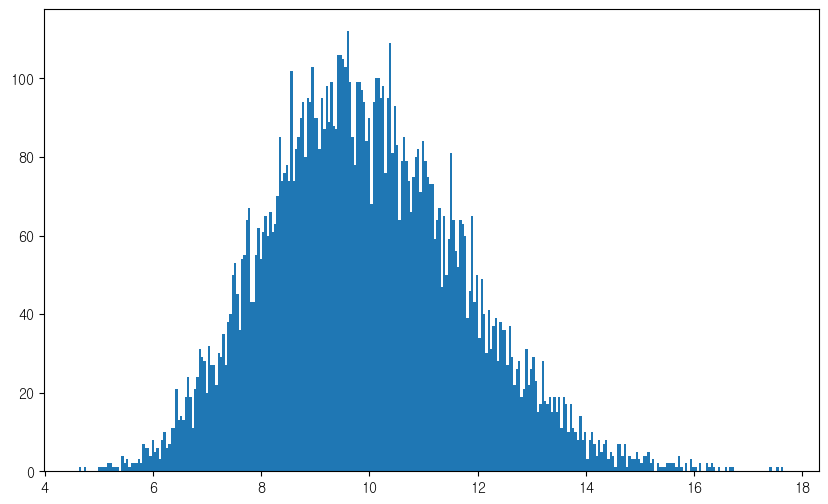

In [64]:
np.random.seed(0)
X_pop = np.random.exponential (scale = 10, size = 10000)
sample_mean = [np.mean(np.random.choice(X_pop, size=30))
               for _ in range(10000)]

plt.hist(sample_mean, bins=300)
plt.show()

# z 점수

In [65]:
mu = 100
sigma = 10

x1 = 110 # z점수를 계산하려고 하는 원래 점수
x2 = 125

# z점수 = (원점수 - 평균) / 표준편차
z_x1 = (x1 - mu) / sigma
z_x2 = (x2 - mu) / sigma
z_x1, z_x2

(1.0, 2.5)

z_x1 = 0.8413 - 0.5 => 0.3414\
z_x2 = 0.9938 - 0.5 => 0.4938

0.4938 - 0.3413 = 0.1525 => About 15%

전체 분포에서 x1~x2 사이의 면적

In [68]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

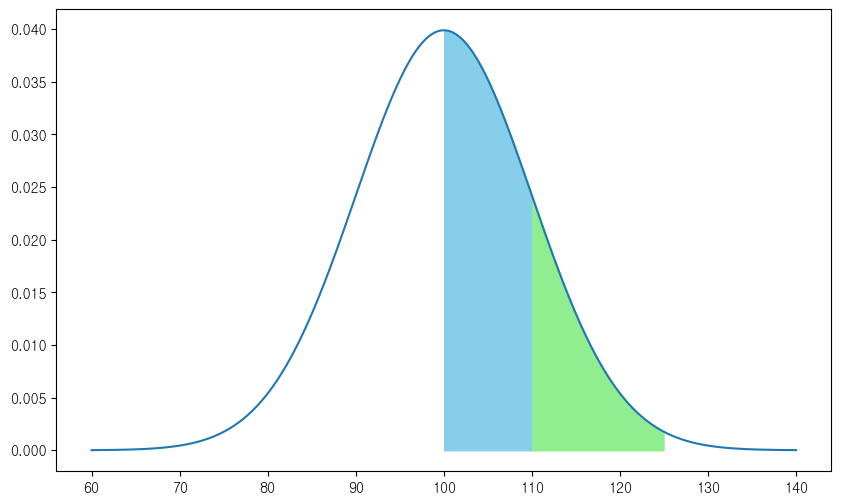

In [72]:
# 시각화
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.fill_between(x,y,where = (x>=100)&(x<=110), color = 'skyblue')
plt.fill_between(x,y,where = (x>110)&(x<=125), color = 'lightgreen')
plt.show()